In [3]:
import pandas as pd # type: ignore
# from sklearn.model_selection import train_test_split # type: ignore
# from sklearn.preprocessing import LabelEncoder, StandardScaler # type: ignore

data = pd.read_csv('https://raw.githubusercontent.com/kavishkadinajara/TRAVELGENIUS/master/ML_model/travel_data.csv')
data

,Number_of_Travelers,Budget,Area_of_Interest,Preferred_Climate,Transportation_Mode,Recommendation
0,6,35000,Beach,Warm,Bikes,"Marble Beach, Trincomalee"
1,4,80000,Forest,Tropical,Public Transport,"Sinharaja Forest Reserve, Deniyaya"
2,2,70000,City,Moderate,Van,"Kurunegala City, Kurunegala"
3,6,17000,Beach,Warm,Bikes,"Jungle Beach, Unawatuna"
4,25,55000,Forest,Tropical,Public Transport,"Hiyare Reservoir, Galle"
...,...,...,...,...,...,...
5744,12,25000,Forest,Tropical,Bikes,"Hiyare Reservoir, Galle"
5745,4,48000,Desert,Hot,Rosa Bus,"Delft Island, Jaffna"
5746,1,15000,National Park,Warm,Rosa Bus,"Kaudulla National Park, Polonnaruwa"
5747,20,90000,National Park,Warm,Bikes,"Wilpattu National Park, Wilpattu"


In [4]:
data.shape

(5749, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5749 entries, 0 to 5748
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Number_of_Travelers  5749 non-null   int64 
 1   Budget               5749 non-null   int64 
 2   Area_of_Interest     5749 non-null   object
 3   Preferred_Climate    5749 non-null   object
 4   Transportation_Mode  5749 non-null   object
 5   Recommendation       5749 non-null   object
dtypes: int64(2), object(4)
memory usage: 269.6+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder

# Dictionary to hold label encoders for each specified column
label_encoders = {}

# List of columns to be label encoded
columns_to_binarize = ['Area_of_Interest', 'Preferred_Climate', 'Transportation_Mode', 'Recommendation']

# Apply LabelEncoder to each specified column
for column in columns_to_binarize:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


In [7]:
# Handle the result_category column separately
result_category = data['Recommendation']
result_binarizer = LabelEncoder()
result = result_binarizer.fit_transform(result_category)

In [8]:
result_category

0       52
1       74
2       45
3       34
4       29
        ..
5744    29
5745    14
5746    39
5747    87
5748    29
Name: Recommendation, Length: 5749, dtype: int64

In [9]:
label_encoders

{'Area_of_Interest': LabelEncoder(),
 'Preferred_Climate': LabelEncoder(),
 'Transportation_Mode': LabelEncoder(),
 'Recommendation': LabelEncoder()}

In [10]:
# Output the classes for the result_category
print(result_binarizer.classes_)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88]


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x = data.drop(columns=['Recommendation'])
y = data['Recommendation']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

pd.DataFrame(x_train)

,0,1,2,3,4
0,0.750000,0.648064,0.428571,0.75,0.00
1,0.333333,0.145299,0.857143,0.00,0.00
2,0.083333,0.220714,0.142857,0.50,0.50
3,0.166667,0.849170,0.571429,0.50,1.00
4,0.375000,0.059829,0.428571,0.75,1.00
...,...,...,...,...,...
4594,0.791667,0.547511,0.571429,0.50,0.50
4595,0.083333,0.597788,1.000000,1.00,0.25
4596,0.791667,0.185520,0.714286,0.50,0.50
4597,0.375000,0.346405,0.285714,0.25,0.75


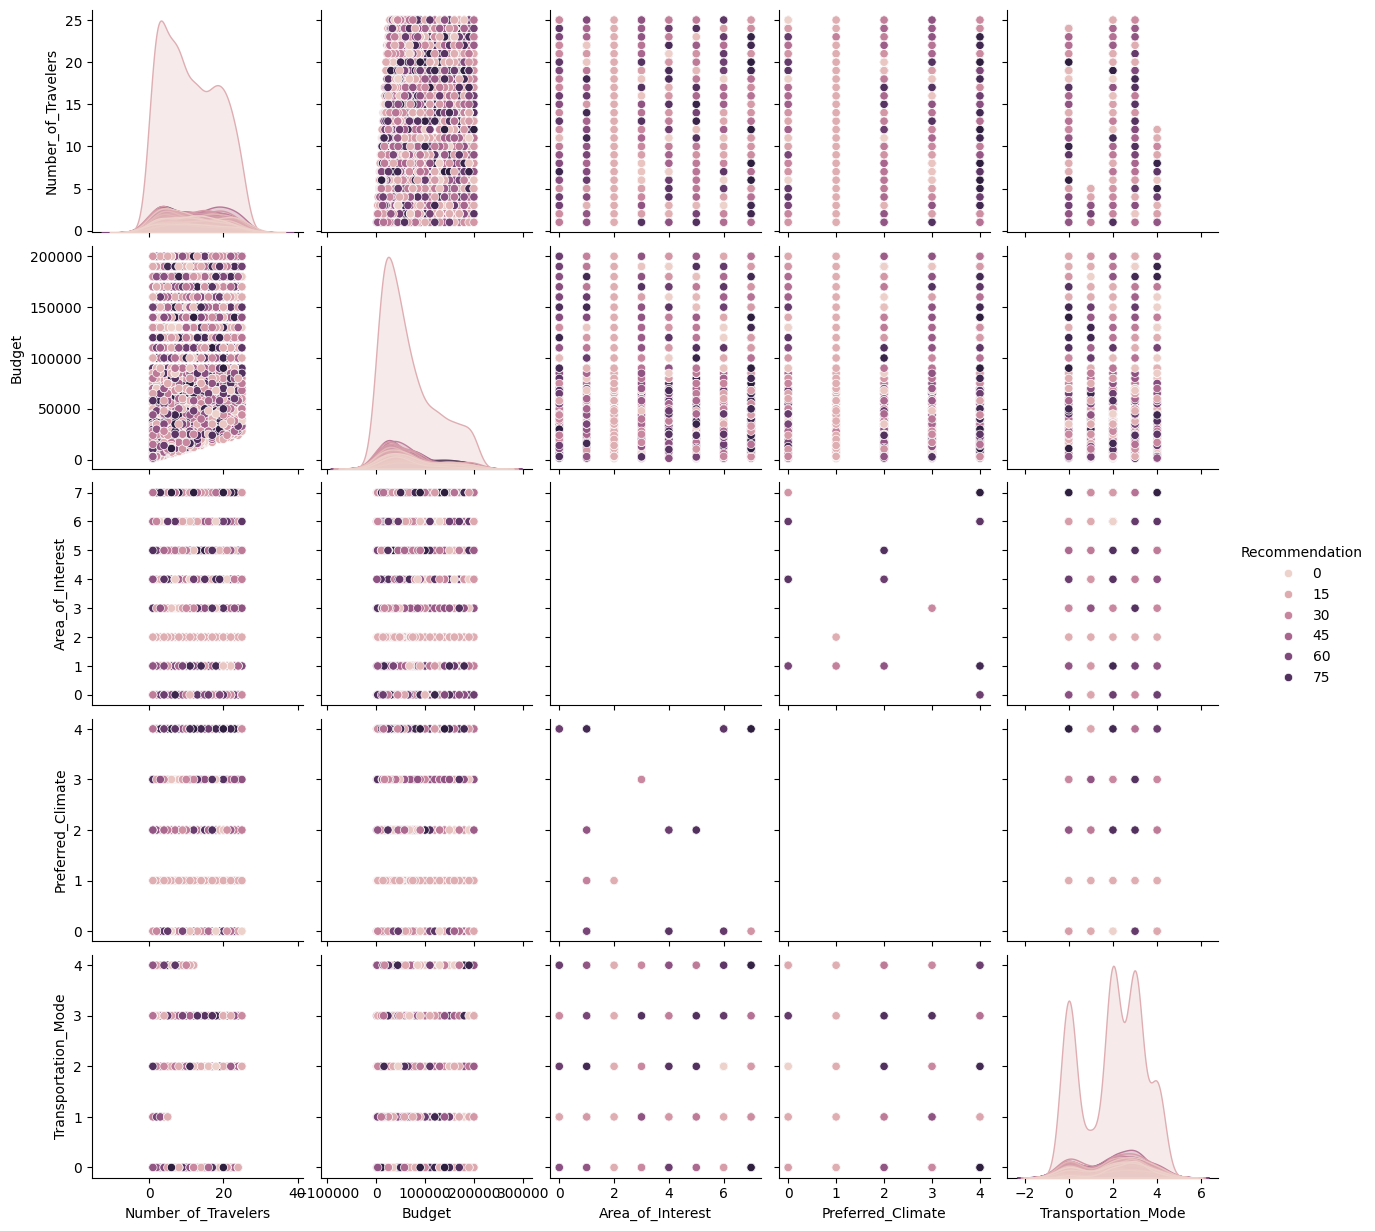

In [14]:
import seaborn as sns
sns.pairplot(data, hue='Recommendation')

<Axes: xlabel='Recommendation', ylabel='count'>

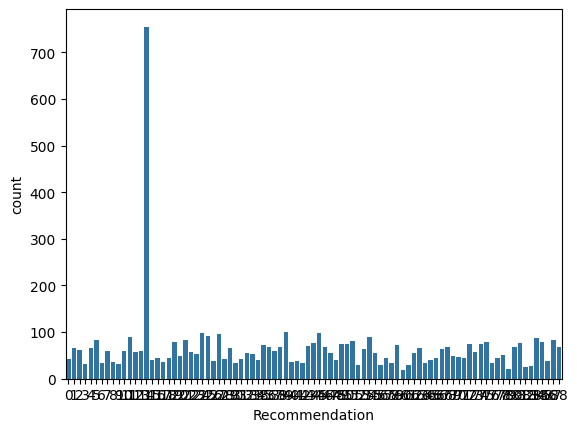

In [15]:
sns.countplot(x='Recommendation', data=data)

In [22]:
x = data.drop('Recommendation', axis=1)
x.head()

,Number_of_Travelers,Budget,Area_of_Interest,Preferred_Climate,Transportation_Mode
0,6,35000,0,4,0
1,4,80000,3,3,2
2,2,70000,1,2,4
3,6,17000,0,4,0
4,25,55000,3,3,2


In [23]:
y = data["Recommendation"]
y.head()

0    52
1    74
2    45
3    34
4    29
Name: Recommendation, dtype: int64

In [24]:
from  sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [25]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train, y_train)

GaussianNB()

In [26]:
predict = NB.predict(x_test)
predict

array([80, 21, 14, ..., 14, 14, 14])

In [27]:
y_test

1526    56
4640    27
511     14
1499    36
2502    45
        ..
5218    56
230     55
4555    14
2388    49
3479    66
Name: Recommendation, Length: 1725, dtype: int64

In [29]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predict)
accuracy

0.16521739130434782

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 2, 3],
       [0, 0, 0, ..., 0, 2, 1]])